In [1]:
# Import libraries

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,classification_report,confusion_matrix,precision_recall_curve

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Fraud_Analysis_Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [3]:
# dataset overview
# Basic info
print("Rows, Columns:", df.shape)
print("\nColumns:\n", df.columns.tolist())

print("\nInfo:")
display(df.info())

Rows, Columns: (11142, 10)

Columns:
 ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


None

In [4]:
print(df.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [5]:
df['isFraud'].value_counts()


isFraud
0    10000
1     1142
Name: count, dtype: int64

In [6]:
#  summary statistics for contineous variables

display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
step,11142.0,8.717645e+00,1.606748e+01,1.00,2.0000,6.000,7.0000,95.0
amount,11142.0,2.131915e+05,7.600650e+05,2.39,4946.6175,16761.260,154336.5750,10000000.0
oldbalanceOrg,11142.0,9.241173e+05,2.143004e+06,0.00,427.0000,28169.500,304085.4800,19900000.0
newbalanceOrig,11142.0,8.249576e+05,2.089894e+06,0.00,0.0000,4420.605,111412.6350,13000000.0
oldbalanceDest,11142.0,8.883541e+05,2.601376e+06,0.00,0.0000,0.000,271155.4725,33000000.0
newbalanceDest,11142.0,1.103211e+06,2.982447e+06,0.00,0.0000,0.000,318637.3600,34600000.0
isFraud,11142.0,1.024951e-01,3.033119e-01,0.00,0.0000,0.000,0.0000,1.0


In [7]:
#summary statistics for categorical variables
df.describe(include='object')

,type,nameOrig,nameDest
count,11142,11142,11142
unique,5,11142,7508
top,PAYMENT,C1637966097,C985934102
freq,5510,1,62


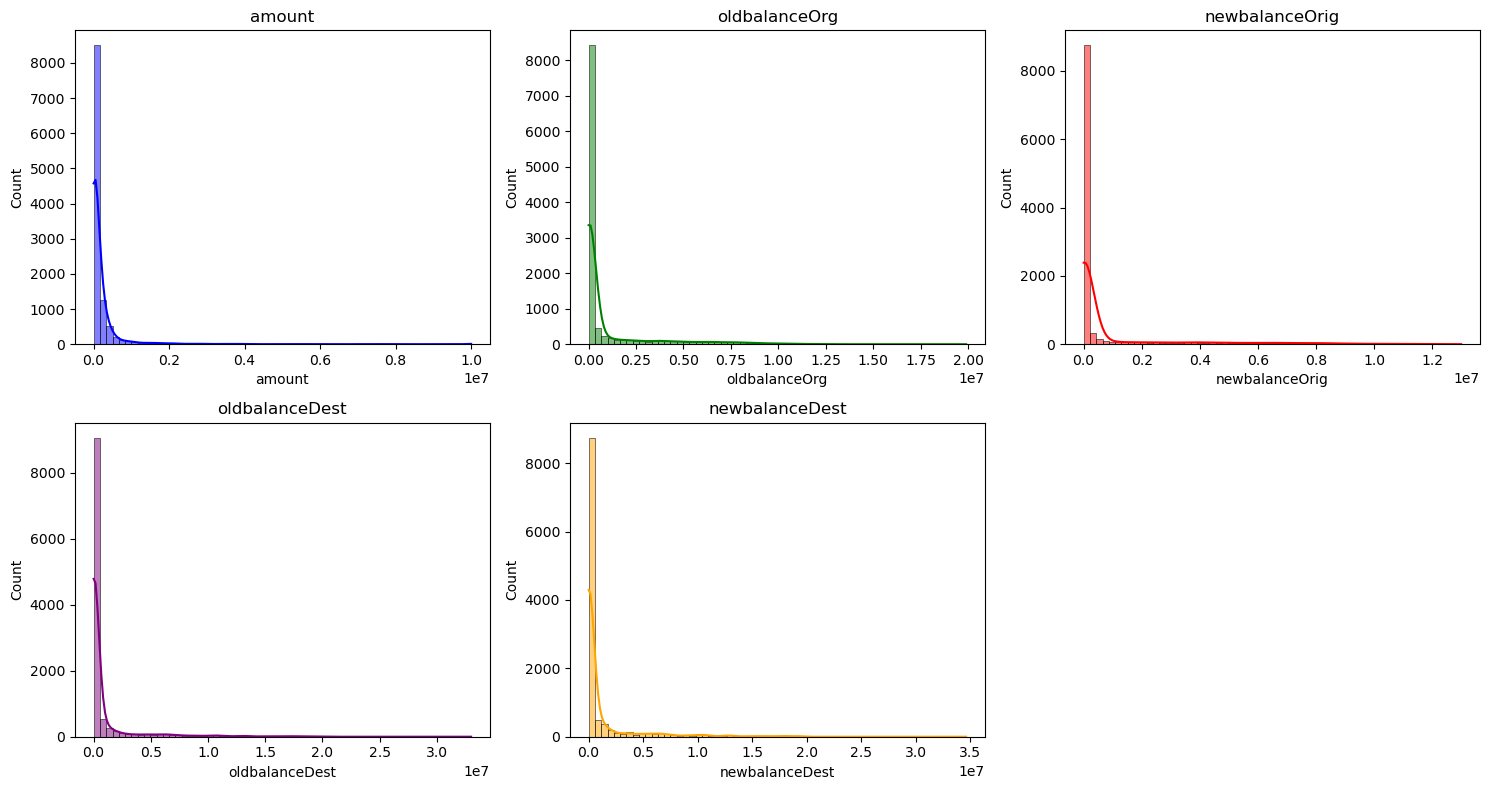

In [8]:
#Exploratary data analysis
#Numerical Univariate (plot a few important numeric features)
num_cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
colors = ['blue', 'green', 'red', 'purple', 'orange']   # different colors
use_log_scale = False  # change to True if you want log scale

plt.figure(figsize=(15, 8))

for i, c in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(
        df[c],
        bins=60,
        kde=True,              # KDE curve enabled
        color=colors[i-1]
    )
    plt.title(c)

    if use_log_scale:
        plt.yscale("log")

plt.tight_layout()
plt.show()

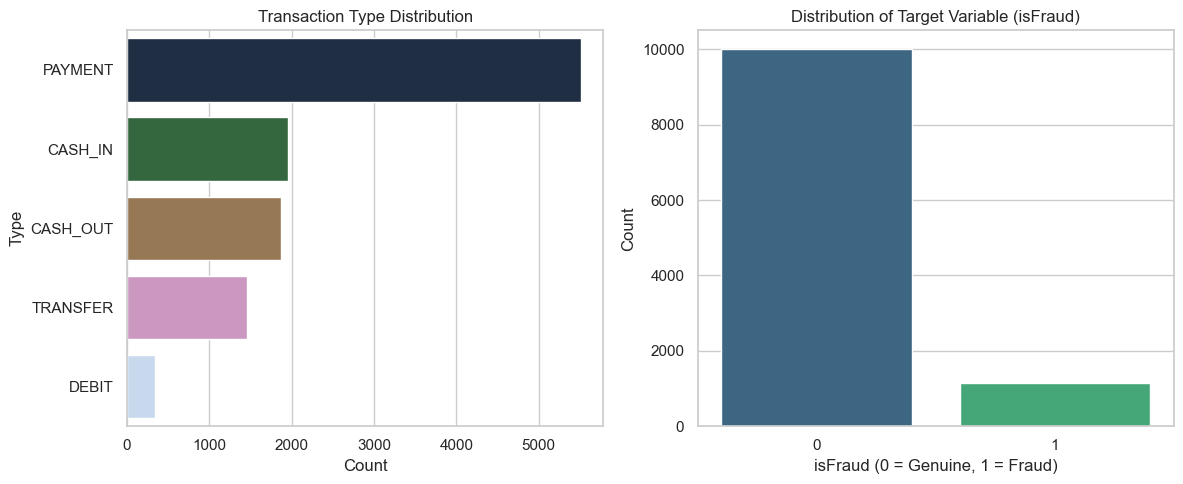

In [9]:
#   Categorical Univariate
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create figure with 2 subplots (1 row, 2 columns)
plt.figure(figsize=(12,5))


if 'type' in df.columns:
    plt.subplot(1, 2, 1)
    sns.countplot(y='type', data=df, order=df['type'].value_counts().index, palette='cubehelix')
    plt.title("Transaction Type Distribution")
    plt.xlabel("Count")
    plt.ylabel("Type")

# --------------------------------
# Plot 2: Target Variable Count
# --------------------------------
plt.subplot(1, 2, 2)
sns.countplot(x=df['isFraud'], palette='viridis')
plt.title("Distribution of Target Variable (isFraud)")
plt.xlabel("isFraud (0 = Genuine, 1 = Fraud)")
plt.ylabel("Count")

# Show plots
plt.tight_layout()
plt.show()


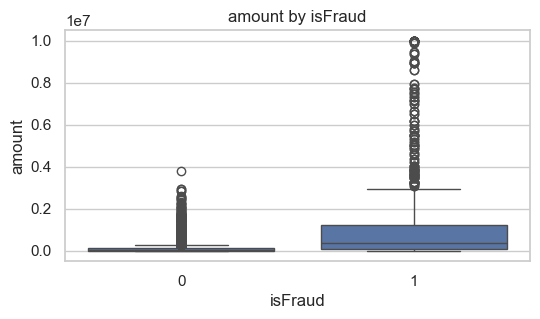

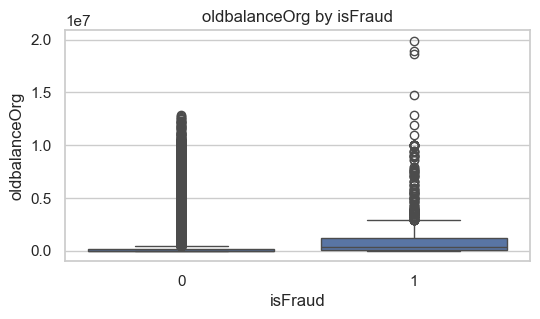

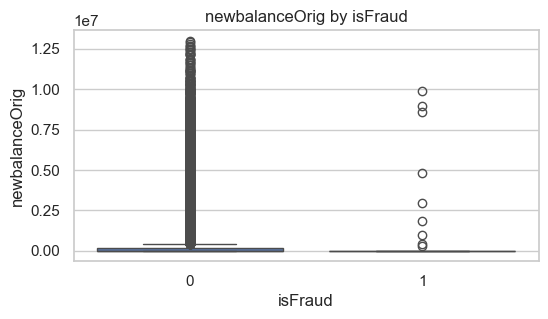

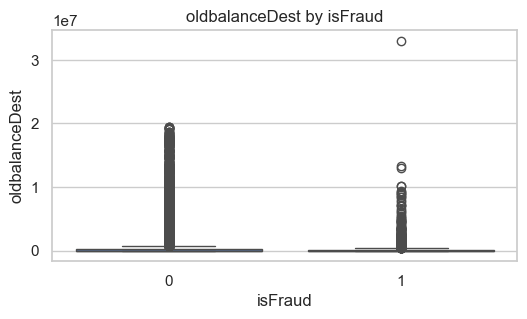

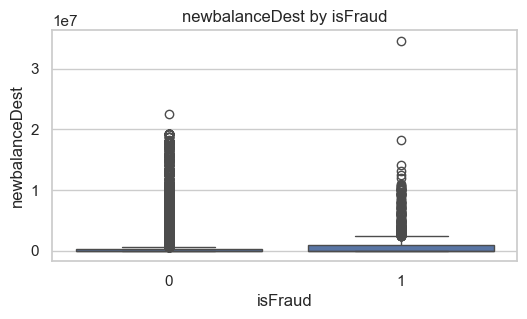

In [10]:

#  Numerical vs Target - boxplots for few keys
if 'isFraud' in df.columns:
    for c in ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']:
        plt.figure(figsize=(6,3))
        sns.boxplot(x='isFraud', y=c, data=df)
        plt.title(f"{c} by isFraud")
        plt.show()


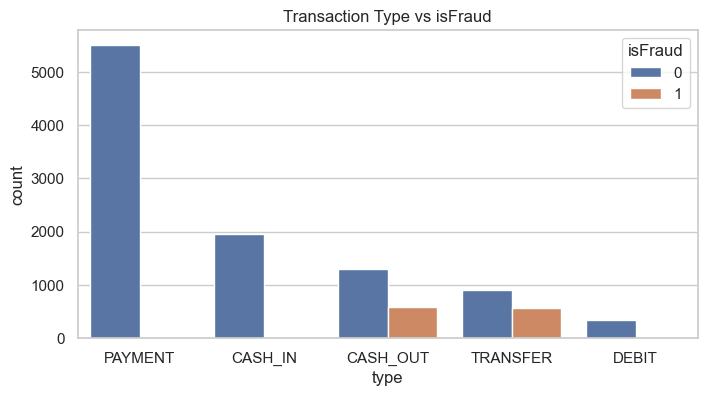

In [11]:
 #Categorical vs Target
if 'type' in df.columns and 'isFraud' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='type', hue='isFraud', data=df, order=df['type'].value_counts().index)
    plt.title("Transaction Type vs isFraud")
    plt.show()

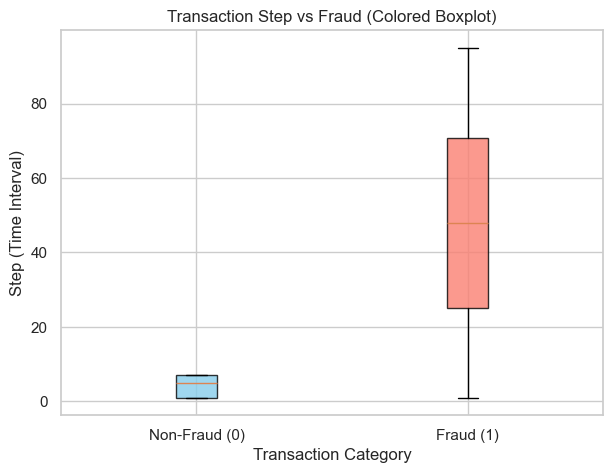

In [12]:
# transaction step by Fraud
nonfraud_steps = df[df['isFraud'] == 0]['step']
fraud_steps     = df[df['isFraud'] == 1]['step']

plt.figure(figsize=(7,5))

# Create boxplot
box = plt.boxplot(
    [nonfraud_steps, fraud_steps],
    labels=['Non-Fraud (0)', 'Fraud (1)'],
    patch_artist=True
)

# Custom colors
colors = ['skyblue', 'salmon']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_alpha(0.8)

plt.title("Transaction Step vs Fraud (Colored Boxplot)")
plt.xlabel("Transaction Category")
plt.ylabel("Step (Time Interval)")
plt.grid(True)
plt.show()

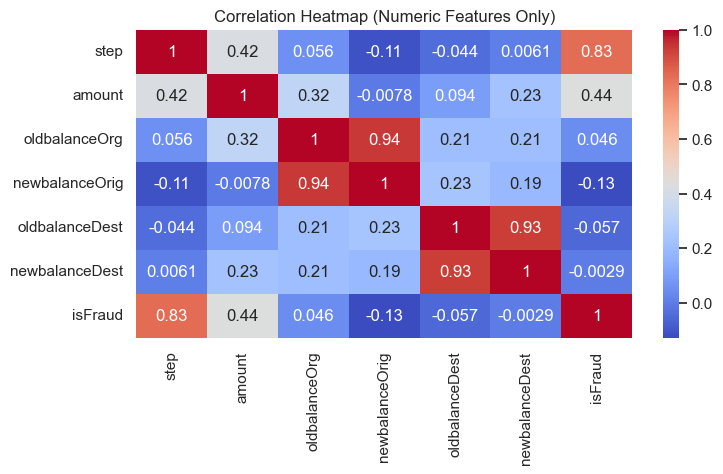

In [13]:
# correlation heatmap(numerical features)

plt.figure(figsize=(8,4))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [14]:
#Remove irrelevant features (example: 'nameOrig','nameDest' if present)
irrelevant = []
for col in ['nameOrig','nameDest','step']:  # adjust based on your dataset
    if col in df.columns:
        irrelevant.append(col)
df = df.drop(columns=irrelevant, errors='ignore')
print("Dropped (if existed):", irrelevant)

Dropped (if existed): ['nameOrig', 'nameDest', 'step']


In [15]:
# Missing values treatment: simple strategies (drop or fill)
print("Missing values per column:\n", df.isna().sum().loc[lambda x: x>0])
# For simplicity, drop rows with NA (or you can impute)
df = df.dropna().reset_index(drop=True)
print("After dropna shape:", df.shape)

Missing values per column:
 Series([], dtype: int64)
After dropna shape: (11142, 7)


In [16]:
#Outlier treatment (example using winsorization for 'amount')
from scipy.stats import mstats
if 'amount' in df.columns:
    df['amount_wins'] = mstats.winsorize(df['amount'], limits=[0.001, 0.01])  # small trimming
    # optionally replace original:
    df['amount'] = df['amount_wins']
    df.drop(columns=['amount_wins'], inplace=True)

In [17]:
# Transaction type Encoding
df['is_transfer'] = (df['type'] == 'TRANSFER').astype(int)
df['is_cashout'] = (df['type'] == 'CASH_OUT').astype(int)


In [18]:
#getting the dummy values
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,is_transfer,is_cashout,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,181.0,181.0,0.0,0.0,0.0,1,1,0,False,False,False,True
1,181.0,181.0,0.0,21182.0,0.0,1,0,1,True,False,False,False
2,2806.0,2806.0,0.0,0.0,0.0,1,1,0,False,False,False,True
3,2806.0,2806.0,0.0,26202.0,0.0,1,0,1,True,False,False,False
4,20128.0,20128.0,0.0,0.0,0.0,1,1,0,False,False,False,True


In [19]:
#Feature scaling &  Transform skewed features handled in modeling section (scaler fitted on training data)
print("Preprocessing complete. Columns now:", df.columns.tolist())

Preprocessing complete. Columns now: ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'is_transfer', 'is_cashout', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


In [20]:
print("\nApplying Log Transformation to skewed features...")

skew_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig',
             'oldbalanceDest', 'newbalanceDest']

import numpy as np
import pandas as pd

for col in skew_cols:
    if col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Replace negative values with 0 (safe for log1p)
            df[col] = df[col].apply(lambda x: max(x, 0))

            # Apply log1p transformation
            df[col] = np.log1p(df[col])
        else:
            print(f"Skipping {col}: non-numeric column.")
    else:
        print(f"Skipping {col}: column not found.")

print("Skewed feature transformation completed!")


Applying Log Transformation to skewed features...
Skewed feature transformation completed!


In [21]:
from sklearn.model_selection import train_test_split

# Safety check
if 'isFraud' not in df.columns:
    raise ValueError("ERROR: 'isFraud' column not found! Cannot perform train-test split.")

# Features and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nShapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Check imbalance ratio before training
print("\nFraud ratio in training set:", y_train.mean())
print("Fraud ratio in test set:", y_test.mean())


Shapes:
X_train: (8913, 11)
y_train: (8913,)
X_test: (2229, 11)
y_test: (2229,)

Fraud ratio in training set: 0.1025468416919107
Fraud ratio in test set: 0.10228802153432032


In [22]:

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

print("\nApplying Scaling + SMOTE correctly...")

# 1. Scale training data (fit only on original training set)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Apply SMOTE on scaled training data (not on unscaled)
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", X_train.shape, y_train.shape)
print("After SMOTE:", X_train_sm.shape, y_train_sm.shape)

print("\nScaling + SMOTE completed correctly.")


Applying Scaling + SMOTE correctly...
Before SMOTE: (8913, 11) (8913,)
After SMOTE: (15998, 11) (15998,)

Scaling + SMOTE completed correctly.


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression Base Model
lr_base = LogisticRegression(max_iter=1000, random_state=42)

# Train ON SMOTEd + Scaled training data
lr_base.fit(X_train_sm, y_train_sm)

# Predictions on scaled test data (NO SMOTE)
y_pred_lr = lr_base.predict(X_test_scaled)

print("\nLogistic Regression - Base Model")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))



Logistic Regression - Base Model
Accuracy: 0.9596231493943472
Precision: 0.7254901960784313
Recall: 0.9736842105263158
F1 Score: 0.8314606741573034


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_tuned = GridSearchCV(
    LogisticRegression(max_iter=2000, random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

# IMPORTANT: train on SMOTEd + SCALED training data
lr_tuned.fit(X_train_sm, y_train_sm)

print("\nBest Parameters:", lr_tuned.best_params_)

best_lr = lr_tuned.best_estimator_


Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [25]:
# logistic regression best model
y_pred_lr_final = best_lr.predict(X_test_scaled)

print("\nLogistic Regression - FINAL Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_final))
print("Precision:", precision_score(y_test, y_pred_lr_final))
print("Recall:", recall_score(y_test, y_pred_lr_final))
print("F1 Score:", f1_score(y_test, y_pred_lr_final))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_final))



Logistic Regression - FINAL Model Evaluation:
Accuracy: 0.9596231493943472
Precision: 0.7254901960784313
Recall: 0.9736842105263158
F1 Score: 0.8314606741573034

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2001
           1       0.73      0.97      0.83       228

    accuracy                           0.96      2229
   macro avg       0.86      0.97      0.90      2229
weighted avg       0.97      0.96      0.96      2229



In [26]:
# decisiontree model


print("\n--- Decision Tree: Base Model ---")

dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train_sm, y_train_sm)

y_pred_dt = dt_base.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))


--- Decision Tree: Base Model ---
Accuracy: 0.9860924181247196
Precision: 0.8987854251012146
Recall: 0.9736842105263158
F1 Score: 0.9347368421052632


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [4, 6, 8, 10, 12, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

dt_tuned = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

dt_tuned.fit(X_train_sm, y_train_sm)

print("\nBest Parameters:", dt_tuned.best_params_)

best_dt = dt_tuned.best_estimator_



Best Parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [28]:
#decision tree best model
y_pred_dt_final = best_dt.predict(X_test_scaled)

print("\n--- Decision Tree: FINAL Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_final))
print("Precision:", precision_score(y_test, y_pred_dt_final))
print("Recall:", recall_score(y_test, y_pred_dt_final))
print("F1 Score:", f1_score(y_test, y_pred_dt_final))

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_final))



--- Decision Tree: FINAL Model Evaluation ---
Accuracy: 0.9865410497981157
Precision: 0.9057377049180327
Recall: 0.9692982456140351
F1 Score: 0.9364406779661016

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2001
           1       0.91      0.97      0.94       228

    accuracy                           0.99      2229
   macro avg       0.95      0.98      0.96      2229
weighted avg       0.99      0.99      0.99      2229



In [29]:
# Randomforest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n--- Random Forest: Base Model ---")

rf_base = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_base.fit(X_train_sm, y_train_sm)

y_pred_rf = rf_base.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))



--- Random Forest: Base Model ---
Accuracy: 0.9946164199192463
Precision: 0.9655172413793104
Recall: 0.9824561403508771
F1 Score: 0.9739130434782609


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_tuned = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid_rf,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

rf_tuned.fit(X_train_sm, y_train_sm)

print("\nBest Parameters:", rf_tuned.best_params_)

best_rf = rf_tuned.best_estimator_



Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [31]:
#Final random forest nodel
y_pred_rf_final = best_rf.predict(X_test_scaled)

print("\n--- Random Forest: FINAL Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_final))
print("Precision:", precision_score(y_test, y_pred_rf_final))
print("Recall:", recall_score(y_test, y_pred_rf_final))
print("F1 Score:", f1_score(y_test, y_pred_rf_final))

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_final))



--- Random Forest: FINAL Model Evaluation ---
Accuracy: 0.9941677882458502
Precision: 0.9653679653679653
Recall: 0.9780701754385965
F1 Score: 0.971677559912854

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       0.97      0.98      0.97       228

    accuracy                           0.99      2229
   macro avg       0.98      0.99      0.98      2229
weighted avg       0.99      0.99      0.99      2229



In [32]:
# XGBoost model
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


In [33]:
print("\n--- XGBoost: Base Model ---")

xgb_base = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5
)

xgb_base.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb_base.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))



--- XGBoost: Base Model ---
Accuracy: 0.9941677882458502
Precision: 0.9613733905579399
Recall: 0.9824561403508771
F1 Score: 0.9718004338394793


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.7, 1]
}

xgb_tuned = GridSearchCV(
    XGBClassifier(
        random_state=42,
        eval_metric='logloss'
    ),
    param_grid_xgb,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

xgb_tuned.fit(X_train_sm, y_train_sm)

print("\nBest Parameters:", xgb_tuned.best_params_)

best_xgb = xgb_tuned.best_estimator_



Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.8}


In [35]:
#XGBoost final model
y_pred_xgb_final = best_xgb.predict(X_test_scaled)

print("\n--- XGBoost: FINAL Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_final))
print("Precision:", precision_score(y_test, y_pred_xgb_final))
print("Recall:", recall_score(y_test, y_pred_xgb_final))
print("F1 Score:", f1_score(y_test, y_pred_xgb_final))

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_final))



--- XGBoost: FINAL Model Evaluation ---
Accuracy: 0.9932705248990579
Precision: 0.9531914893617022
Recall: 0.9824561403508771
F1 Score: 0.9676025917926566

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2001
           1       0.95      0.98      0.97       228

    accuracy                           0.99      2229
   macro avg       0.98      0.99      0.98      2229
weighted avg       0.99      0.99      0.99      2229



In [36]:
# model comparisoion

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
import pandas as pd
results = []

# ============================
# LOGISTIC REGRESSION
# ============================
y_pred = best_lr.predict(X_test_scaled)
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
lr_roc_auc = roc_auc_score(y_test, y_proba)
p, r, _ = precision_recall_curve(y_test, y_proba)
lr_pr_auc = auc(r, p)

results.append(["Logistic Regression", lr_precision, lr_recall, lr_f1, lr_roc_auc, lr_pr_auc])


# ============================
# DECISION TREE
# ============================
y_pred = best_dt.predict(X_test_scaled)
y_proba = best_dt.predict_proba(X_test_scaled)[:, 1]

dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
dt_roc_auc = roc_auc_score(y_test, y_proba)
p, r, _ = precision_recall_curve(y_test, y_proba)
dt_pr_auc = auc(r, p)

results.append(["Decision Tree", dt_precision, dt_recall, dt_f1, dt_roc_auc, dt_pr_auc])


# ============================
# RANDOM FOREST
# ============================
y_pred = best_rf.predict(X_test_scaled)
y_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, y_proba)
p, r, _ = precision_recall_curve(y_test, y_proba)
rf_pr_auc = auc(r, p)

results.append(["Random Forest", rf_precision, rf_recall, rf_f1, rf_roc_auc, rf_pr_auc])


# ============================
# XGBOOST
# ============================
y_pred = best_xgb.predict(X_test_scaled)
y_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]

xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_roc_auc = roc_auc_score(y_test, y_proba)
p, r, _ = precision_recall_curve(y_test, y_proba)
xgb_pr_auc = auc(r, p)

results.append(["XGBoost", xgb_precision, xgb_recall, xgb_f1, xgb_roc_auc, xgb_pr_auc])


# ============================
# FINAL TABLE
# ============================
results_df = pd.DataFrame(
    results,
    columns=["Model", "Precision", "Recall", "F1 Score", "ROC AUC", "PR AUC"]
)

results_df


,Model,Precision,Recall,F1 Score,ROC AUC,PR AUC
0,Logistic Regression,0.725490,0.973684,0.831461,0.992008,0.939898
1,Decision Tree,0.905738,0.969298,0.936441,0.988927,0.971747
2,Random Forest,0.965368,0.978070,0.971678,0.992256,0.988002
3,XGBoost,0.953191,0.982456,0.967603,0.993806,0.989250


In [37]:
# Train and Test scores

best_model_name = "Random Forest"
best_model = best_rf
train_score = best_model.score(X_train_scaled, y_train)   # accuracy on training data
test_score  = best_model.score(X_test_scaled, y_test)     # accuracy on test data

print(f"\n{best_model_name} Performance:")
print(f"Train Score: {train_score:.4f}")
print(f"Test Score : {test_score:.4f}")


Random Forest Performance:
Train Score: 1.0000
Test Score : 0.9942


In [38]:
print("\nModel Performance Comparison:")
print(results_df.round(4).sort_values(by="F1 Score", ascending=False))



Model Performance Comparison:
                 Model  Precision  Recall  F1 Score  ROC AUC  PR AUC
2        Random Forest     0.9654  0.9781    0.9717   0.9923  0.9880
3              XGBoost     0.9532  0.9825    0.9676   0.9938  0.9892
1        Decision Tree     0.9057  0.9693    0.9364   0.9889  0.9717
0  Logistic Regression     0.7255  0.9737    0.8315   0.9920  0.9399


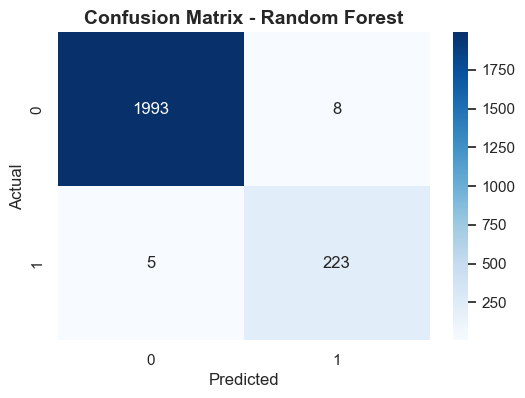


Confusion Matrix:
[[1993    8]
 [   5  223]]


In [39]:
#  confusion matrix for best model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Best model = Random Forest
best_model = best_rf
best_model_name = "Random Forest"

# Predictions using SCALED test data
y_best_pred = best_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_best_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}", fontsize=14, fontweight="bold")
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

print("\nConfusion Matrix:")
print(cm)


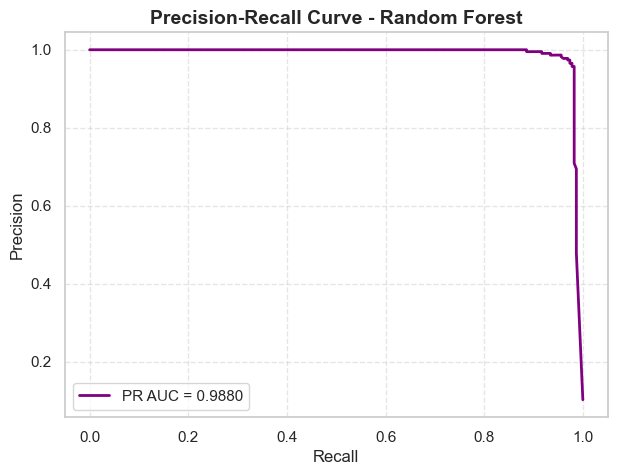

In [40]:
#Precision-Recall Curve for Best Model
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Best model = Random Forest
best_model = best_rf
best_model_name = "Random Forest"

# Probabilities using SCALED test data
y_best_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Precision–Recall values
precision, recall, _ = precision_recall_curve(y_test, y_best_proba)

# PR AUC Score
pr_auc = auc(recall, precision)

# Plot PR Curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, linewidth=2, label=f"PR AUC = {pr_auc:.4f}", color="purple")
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title(f"Precision-Recall Curve - {best_model_name}", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()



In [41]:
best_model


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [42]:
# fianl model
from sklearn.preprocessing import StandardScaler

# Full feature set and target
X_full = df.drop("isFraud", axis=1)
y_full = df["isFraud"]

# Scale full dataset (fit on full data)
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)


In [43]:
best_model = best_rf   # Random Forest is best model

best_model.fit(X_full_scaled, y_full)

print("Best model retrained on the full dataset successfully.")


Best model retrained on the full dataset successfully.


In [44]:
#Saving the final model
import joblib

joblib.dump(best_model, "final_rf_model.pkl")
joblib.dump(scaler_full, "final_scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
